# Zomato Bangalore Insights: Trends, Ratings & Costs

## Problem Statement

- This project aims to perform exploratory data analysis on a food-delivery/restaurant dataset to discover patterns in pricing, customer ratings, popularity, and location distribution, and to build simple insights and tools that help users make better dining choices while helping businesses understand market trends and customer preferences.



In [1]:
# Importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [3]:
# Importing the dataset
df = pd.read_csv(r"zomato.csv") 
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
# Deleting unnecessary columns
del df["url"]
del df["address"]
del df["phone"]

In [7]:
# Duplicates values
df.duplicated().sum()

63

In [8]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [9]:
# Checking the NaN values
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7760
votes                              0
location                          21
rest_type                        227
dish_liked                     28027
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
# Calculating the percentage of NaN values
def missing_data_summary(df):
    # Calculate the count of missing values
    missing_count = df.isnull().sum()
    
    # Calculate the percentage of missing values
    missing_percent = (missing_count / len(df)) * 100
    
    # Create a DataFrame with both metrics
    missing_data = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percent.round(2)  # Round to 2 decimal places
    })
    
    # Only show columns that have at least one missing value
    return missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

# Example usage:
missing_data_summary(df)

,Missing Count,Missing Percentage
dish_liked,28027,54.26
rate,7760,15.02
approx_cost(for two people),345,0.67
rest_type,227,0.44
cuisines,45,0.09
location,21,0.04


In [11]:
# Deleting 'dish_liked' column as it contains most number of missing values
del df["dish_liked"]

In [12]:
# Dropping all NaN values
df.dropna(how='any',inplace=True) 

In [13]:
# Checking the NaN values again
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [14]:
# Reading Column Names
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [15]:
# Changing the column names
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

In [16]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [18]:
print(type(df['cost'])) # = df['cost'].astype(float)

<class 'pandas.core.series.Series'>


In [19]:
# Some datatype transformations
df['cost'] = df['cost'].astype(str) #Changing the cost to string
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float) # Changing the cost to Float
df.info() # looking at the dataset information after transformation


<class 'pandas.core.frame.DataFrame'>
Index: 43486 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43486 non-null  object 
 1   online_order  43486 non-null  object 
 2   book_table    43486 non-null  object 
 3   rate          43486 non-null  object 
 4   votes         43486 non-null  int64  
 5   location      43486 non-null  object 
 6   rest_type     43486 non-null  object 
 7   cuisines      43486 non-null  object 
 8   cost          43486 non-null  float64
 9   reviews_list  43486 non-null  object 
 10  menu_item     43486 non-null  object 
 11  type          43486 non-null  object 
 12  city          43486 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 4.6+ MB


In [20]:
print(type(df['cost']))

<class 'pandas.core.series.Series'>


In [21]:
# Checking for odd values 
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
# Removing '/5' from Rates
df = df.loc[df.rate !='NEW'] #Removed rows which were having "new"
df = df.loc[df.rate !='-'].reset_index(drop=True) #Removed rows which were having "-"
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x #Function 
df.rate = df.rate.apply(remove_slash).str.strip().astype(float)#apply function to col
df['rate'].head() # looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41226 entries, 0 to 41225
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41226 non-null  object 
 1   online_order  41226 non-null  object 
 2   book_table    41226 non-null  object 
 3   rate          41226 non-null  float64
 4   votes         41226 non-null  int64  
 5   location      41226 non-null  object 
 6   rest_type     41226 non-null  object 
 7   cuisines      41226 non-null  object 
 8   cost          41226 non-null  float64
 9   reviews_list  41226 non-null  object 
 10  menu_item     41226 non-null  object 
 11  type          41226 non-null  object 
 12  city          41226 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 4.1+ MB


In [24]:
# To get average cost of a meal 
df['cost'].mean()

603.9612380536555

# How many restaurants have online delivery option?

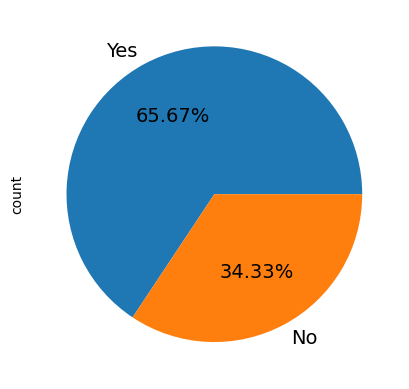

In [25]:
# Plotting how many restaurants have online delivery option
df.online_order.value_counts().plot.pie(fontsize = 14, autopct = '%.2f%%')
plt.show()

# How many customers reserve a table?

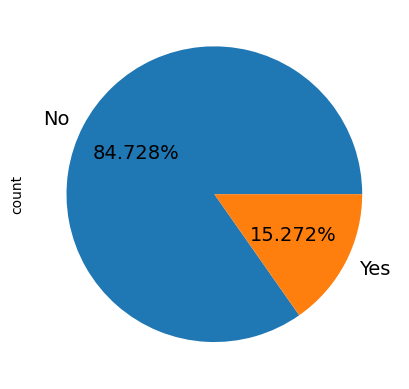

In [26]:
# PLotting how many customers reserve a table 
df.book_table.value_counts().plot.pie(fontsize = 14, autopct = '%.3f%%')
plt.show()

# Largest Food Chain in Bangalore 

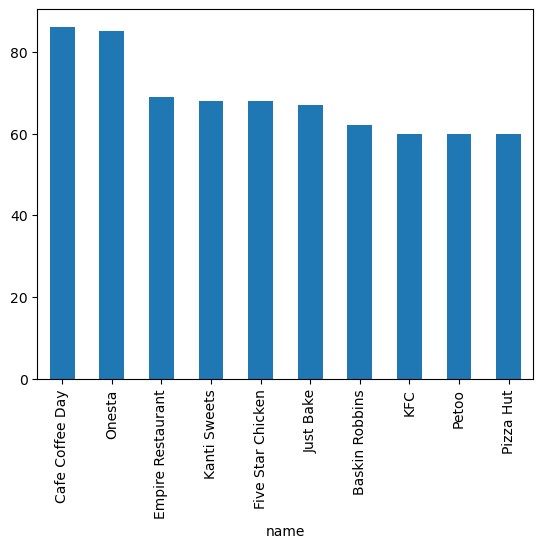

In [27]:
df.name.value_counts().head(10).plot(kind="bar")
plt.show()

# Most Popular Restaurant types 

            rest_type  count
0         Quick Bites  13866
1       Casual Dining   9605
2                Cafe   3368
3      Dessert Parlor   1850
4            Delivery   1666
5  Takeaway, Delivery   1278
6  Casual Dining, Bar   1092
7              Bakery    704
8                 Bar    640
9       Beverage Shop    638


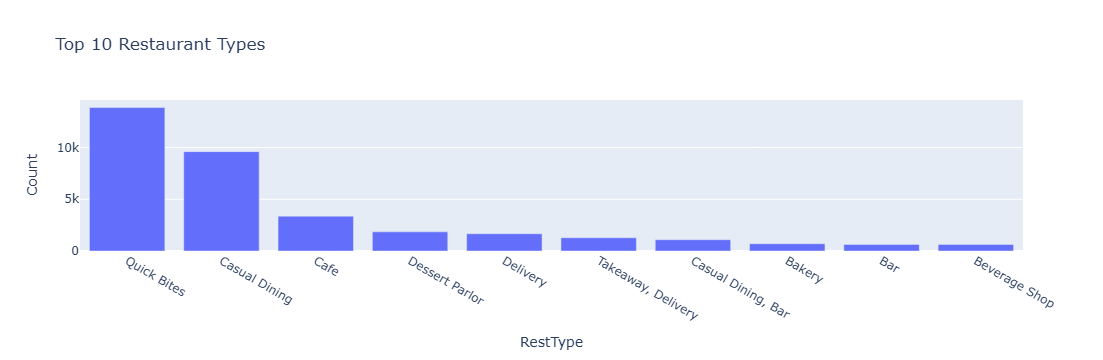

In [28]:
import plotly.express as px

# Prepare the data
top_rest_types = df['rest_type'].value_counts().head(10).reset_index()
print(top_rest_types)
top_rest_types.columns = ['RestType', 'Count']

# Plot
fig = px.bar(top_rest_types, x='RestType', y='Count', title='Top 10 Restaurant Types')
fig.show()

In [29]:
df.describe()

,rate,votes,cost
count,41226.000000,41226.000000,41226.000000
mean,3.702091,352.863217,603.961238
std,0.440063,884.509575,464.985064
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.500000,500.000000
75%,4.000000,278.000000,750.000000
max,4.900000,16832.000000,6000.000000


# A Box plot of Cost, Votes and Ratings

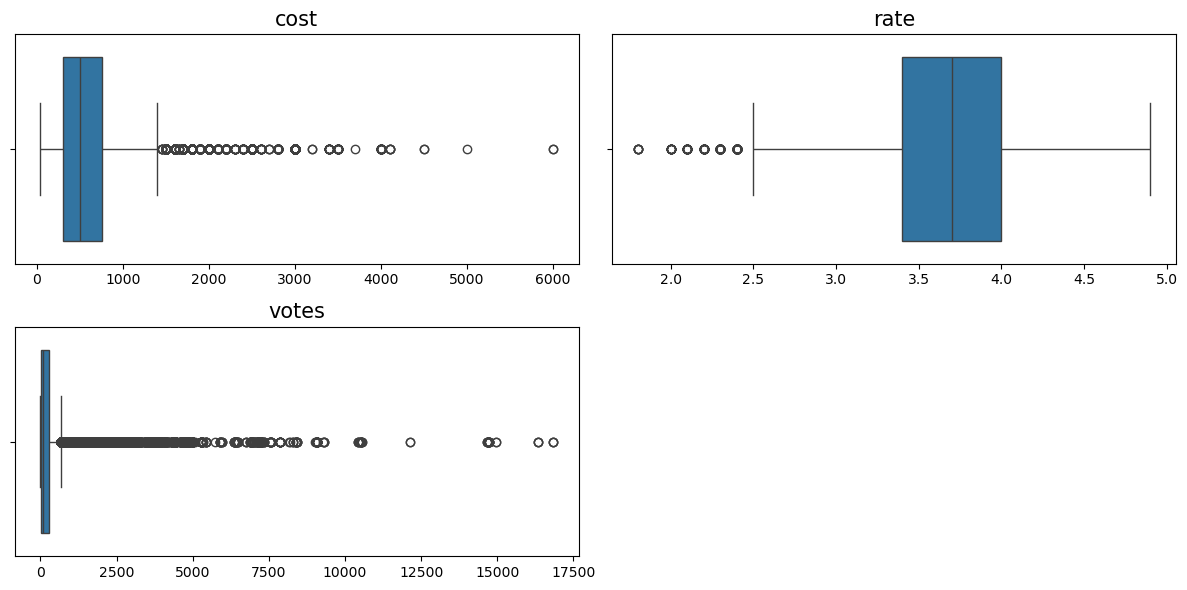

In [30]:
# Creating a box plot of cost, votes and rate
num_cols = ['cost', 'rate', 'votes']

plt.figure(figsize=(12, 6))

# Loop through each column with its index
for i, col in enumerate(num_cols):
    
    # Create subplots in a grid of 2 rows and 2 columns
    # i+1 decides the position of each plot
    plt.subplot(2, 2, i + 1)
    
    # Draw boxplot for the current column
    sns.boxplot(x=df[col])
    
    plt.title(col, fontsize = 15)

    plt.xlabel("")
    
plt.tight_layout()
plt.show()

Most restaurants have moderate cost and votes, but a few are extremely high, while ratings are mostly similar and fall within a small range.


# Expensive Restaurants in Bangalore

In [31]:
df[df.cost>3000].sort_values(ascending=False,by="cost")

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
15114,Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,Old Airport Road,Fine Dining,"French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
36363,Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,Old Airport Road,Fine Dining,"French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road
32048,Royal Afghan - ITC Windsor,No,Yes,4.3,413,Sankey Road,Fine Dining,"North Indian, Mughlai",5000.0,"[('Rated 5.0', 'RATED\n It is just Bukhara wi...",[],Dine-out,Malleshwaram
33105,Malties - Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Continental, Fast Food",4500.0,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Dine-out,Marathahalli
33520,Malties - Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Continental, Fast Food",4500.0,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Drinks & nightlife,Marathahalli
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33562,The Market - The Ritz-Carlton,No,Yes,4.3,620,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('Rated 3.0', 'RATED\n Went there for buffet...",[],Buffet,MG Road
31079,b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,No,Yes,4.3,429,Vasanth Nagar,"Fine Dining, Bar","North Indian, Italian, Chinese, Japanese",3400.0,"[('Rated 2.0', ""RATED\n I was here last Sunda...",[],Dine-out,Lavelle Road
3985,The Market - The Ritz-Carlton,No,Yes,4.3,622,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('Rated 4.0', 'RATED\n Had breakfast at the ...",[],Buffet,Brigade Road
10421,Blue Ginger - The Taj West End,No,Yes,4.4,514,Race Course Road,Fine Dining,Vietnamese,3200.0,"[('Rated 5.0', 'RATED\n Such an elegant place...",[],Dine-out,Church Street


Expensive Restaurants Don't take online orders but table booking is Available.

Majority of Expensive Restaurants are having ratings above 4.

In [32]:
df[df.cost>3000].sort_values(ascending=False,by="cost")

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
15114,Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,Old Airport Road,Fine Dining,"French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
36363,Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,Old Airport Road,Fine Dining,"French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road
32048,Royal Afghan - ITC Windsor,No,Yes,4.3,413,Sankey Road,Fine Dining,"North Indian, Mughlai",5000.0,"[('Rated 5.0', 'RATED\n It is just Bukhara wi...",[],Dine-out,Malleshwaram
33105,Malties - Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Continental, Fast Food",4500.0,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Dine-out,Marathahalli
33520,Malties - Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Continental, Fast Food",4500.0,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Drinks & nightlife,Marathahalli
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33562,The Market - The Ritz-Carlton,No,Yes,4.3,620,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('Rated 3.0', 'RATED\n Went there for buffet...",[],Buffet,MG Road
31079,b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,No,Yes,4.3,429,Vasanth Nagar,"Fine Dining, Bar","North Indian, Italian, Chinese, Japanese",3400.0,"[('Rated 2.0', ""RATED\n I was here last Sunda...",[],Dine-out,Lavelle Road
3985,The Market - The Ritz-Carlton,No,Yes,4.3,622,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('Rated 4.0', 'RATED\n Had breakfast at the ...",[],Buffet,Brigade Road
10421,Blue Ginger - The Taj West End,No,Yes,4.4,514,Race Course Road,Fine Dining,Vietnamese,3200.0,"[('Rated 5.0', 'RATED\n Such an elegant place...",[],Dine-out,Church Street


In [33]:
# Creating a seperate DataFrame for the location where the most expensive restaurants are present
x1=df[df.cost>3000] 
x1=x1.sort_values(ascending=False,by="cost")
x1=x1.location.value_counts(ascending=False)
print(x1)

location
Residency Road      38
Old Airport Road    10
Richmond Road       10
Sankey Road          7
Lavelle Road         4
Race Course Road     4
Vasanth Nagar        3
Marathahalli         2
Seshadripuram        1
Name: count, dtype: int64


# Where are most of the expensive Restaurants are located ?

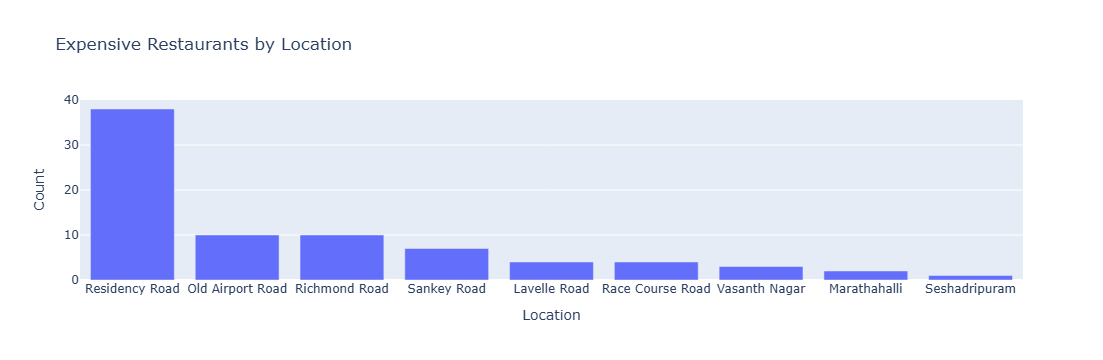

In [34]:
# Get the value counts of locations for expensive restaurants
location_counts = df[df.cost > 3000].sort_values(by="cost", ascending=False).location.value_counts()

# Create a bar chart using Plotly Express
fig = px.bar(
    x=location_counts.index,  # Location names
    y=location_counts.values,  # Count values
    labels={'x': 'Location', 'y': 'Count'},
    title='Expensive Restaurants by Location'
)

fig.show()

 Majority of Expensive Restaurants are located in Residency Road

# Types of the most of the expensive restaurants

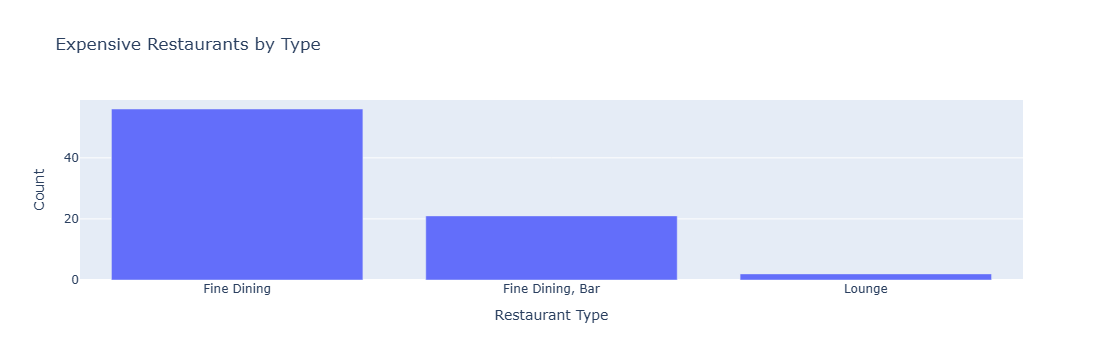

In [35]:
# Get the value counts of restaurant types for expensive restaurants
rest_type_counts = df[df.cost > 3000].rest_type.value_counts()

# Create a bar chart using Plotly Express
fig = px.bar(
    x=rest_type_counts.index,  # Restaurant types
    y=rest_type_counts.values,  # Count values
    labels={'x': 'Restaurant Type', 'y': 'Count'},
    title='Expensive Restaurants by Type'
)

fig.show()

 Majority of Expensive Restaurants are Fine Dining.

# Ratings by Type of Restaurants

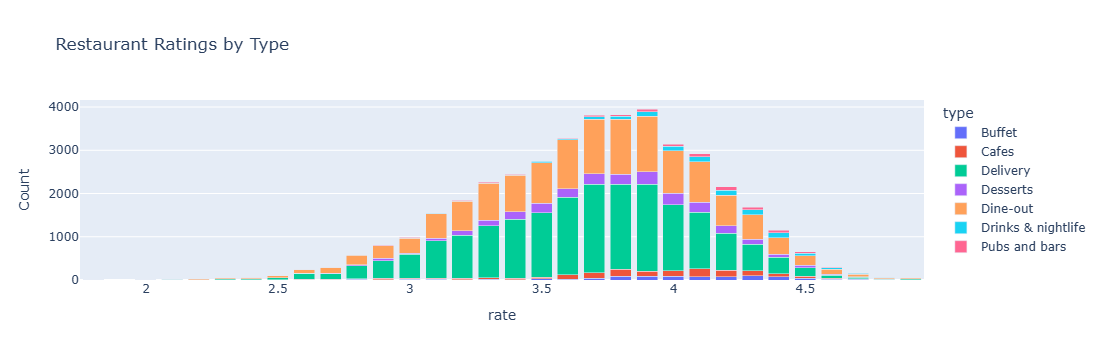

In [36]:
# Create the crosstab
rate_type = pd.crosstab(df['rate'], df['type'])

# Create a stacked bar chart using Plotly Express
fig = px.bar(
    rate_type,
    barmode='stack',
    labels={'index': 'Rating', 'value': 'Count', 'variable': 'Restaurant Type'},
    title='Restaurant Ratings by Type'
)

fig.show()

In [37]:
# Top 10 highest voted restaurants
df.sort_values(ascending=False,by="votes").head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
39990,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Drinks & nightlife,Sarjapur Road
39315,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', ""RATED\n This is an absolute g...",[],Delivery,Sarjapur Road
39640,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Dine-out,Sarjapur Road
3935,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Drinks & nightlife,Bellandur
3824,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Dine-out,Bellandur
3171,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...",[],Delivery,Bellandur
15211,Toit,No,No,4.7,14956,Indiranagar,Microbrewery,"Italian, American, Pizza",1500.0,"[('Rated 4.0', ""RATED\n The crowd keeps flowi...",[],Drinks & nightlife,Indiranagar
14689,Toit,No,No,4.7,14956,Indiranagar,Microbrewery,"Italian, American, Pizza",1500.0,"[('Rated 4.0', ""RATED\n The crowd keeps flowi...",[],Dine-out,Indiranagar
29066,Truffles,No,No,4.7,14726,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,"[('Rated 3.0', ""RATED\n Not bad but the burge...",[],Dine-out,Koramangala 7th Block
28615,Truffles,No,No,4.7,14723,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,"[('Rated 3.0', ""RATED\n Not bad but the burge...",[],Delivery,Koramangala 7th Block


# Restaurants per location

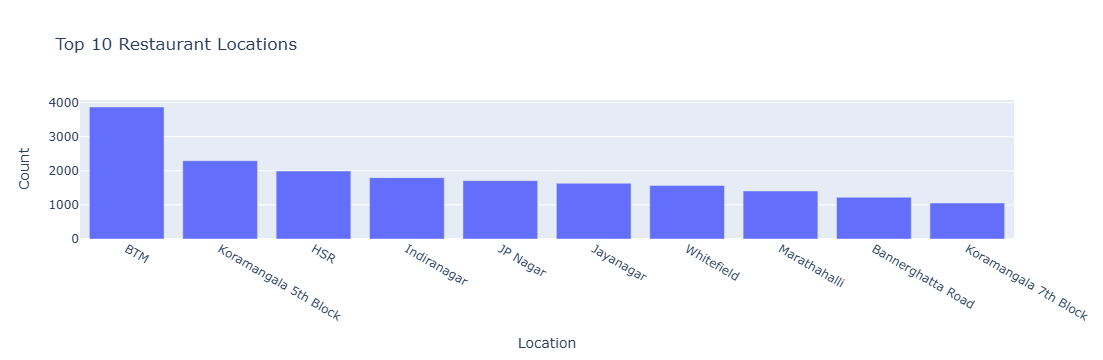

In [38]:
# Get the top 10 locations by count
top_locations = df["location"].value_counts().head(10)

# Create a bar chart using Plotly Express
fig = px.bar(
    x=top_locations.index,  # Location names
    y=top_locations.values,  # Count values
    labels={'x': 'Location', 'y': 'Count'},
    title='Top 10 Restaurant Locations'
)

fig.show()

BTM has the highest number of restaurants (around 4000), followed by Koramangala 5th Block (about 2300), while HSR and other areas have noticeably fewer restaurants with only small differences among them.

# Relationship Between Restaurant Ratings and Cost with Online Order & Table Booking Options

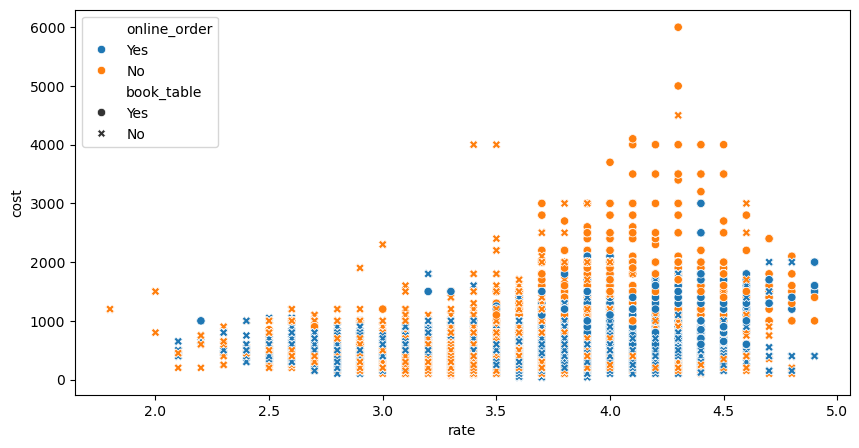

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df,style="book_table")
plt.show()

As ratings increase, restaurant cost generally tends to rise, and higher-rated restaurants more often provide online ordering and table booking options.

# Best Economical Restaurants 

In [40]:
# Restaunats which are cheap and also have good ratings
df[(df["cost"]<=100) & (df["rate"]>=4)].sort_values(by=["rate"],ascending=False)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
2666,Brahmin's Coffee Bar,No,No,4.8,2679,Basavanagudi,Quick Bites,South Indian,100.0,"[('Rated 5.0', ""RATED\n Very soft idly, soft ...",[],Dine-out,Basavanagudi
547,Taaza Thindi,No,No,4.7,651,Banashankari,Quick Bites,South Indian,100.0,"[('Rated 5.0', 'RATED\n One of the cleanest s...",[],Dine-out,Banashankari
16959,Sri Laxmi Venkateshwara Coffee Bar,No,No,4.4,344,Banashankari,Quick Bites,South Indian,100.0,"[('Rated 4.0', ""RATED\n For Early morning bre...",[],Dine-out,Jayanagar
556,Sri Laxmi Venkateshwara Coffee Bar,No,No,4.4,343,Banashankari,Quick Bites,South Indian,100.0,"[('Rated 4.0', ""RATED\n For Early morning bre...",[],Dine-out,Banashankari
2851,Sri Laxmi Venkateshwara Coffee Bar,No,No,4.4,343,Banashankari,Quick Bites,South Indian,100.0,"[('Rated 4.0', ""RATED\n For Early morning bre...",[],Dine-out,Basavanagudi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23371,Hari Super Sandwich,Yes,No,4.0,18,BTM,Quick Bites,"Sandwich, Fast Food",100.0,"[('Rated 3.0', 'RATED\n A different way of se...","['Veg Pizza [6 inches]', 'Paneer Pizza [6 inch...",Delivery,Koramangala 5th Block
21114,Hari Super Sandwich,Yes,No,4.0,16,BTM,Quick Bites,"Sandwich, Fast Food",100.0,"[('Rated 3.0', 'RATED\n A different way of se...","['Veg Pizza [6 inches]', 'Capsicum Pizza [6 in...",Delivery,Koramangala 4th Block
21018,Shiv Shakthi,Yes,No,4.0,176,HSR,Quick Bites,"Street Food, North Indian",100.0,"[('Rated 4.0', 'RATED\n After along time ..th...","['Jalebi [100 grams]', 'Samosa [1 Piece]', 'Da...",Delivery,Koramangala 4th Block
2023,SL Vadapav,Yes,No,4.0,78,Jayanagar,Quick Bites,Maharashtrian,100.0,"[('Rated 4.0', 'RATED\n Zomato home delivery ...",[],Delivery,Basavanagudi


# Where are most of the best cheapest  Restaurants are located ?

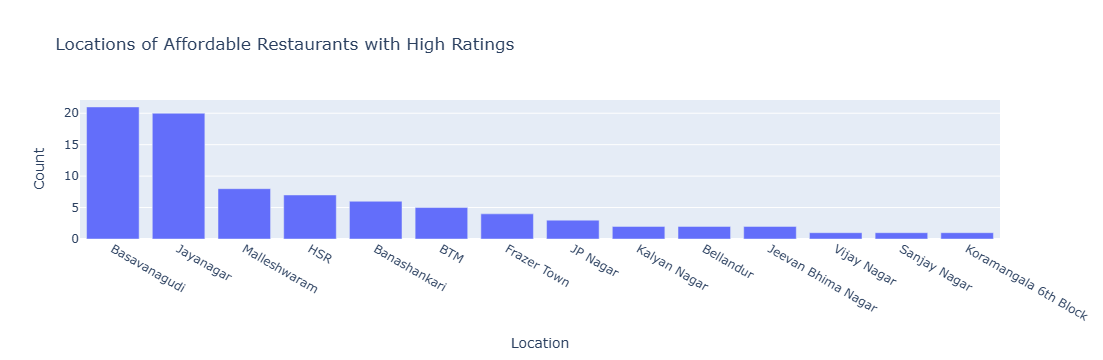

In [41]:
# Filter for affordable restaurants with high ratings and get location counts
affordable_high_rated = df[(df["cost"] <= 100) & (df["rate"] >= 4)].sort_values(by=["rate"], ascending=False)
location_counts = affordable_high_rated.location.value_counts()

# Create a bar chart using Plotly Express
fig = px.bar(
    x=location_counts.index,  # Location names
    y=location_counts.values,  # Count values
    labels={'x': 'Location', 'y': 'Count'},
    title='Locations of Affordable Restaurants with High Ratings'
)

fig.show()

Best Cheap Restaurants are located at Basavangudi, jayanagar, malleshwaram & HSR

In [42]:
df["cost"].mean()

603.9612380536555

# Best Average Cost Restaurants

In [43]:
# Restaunats which are moderately priced and also have good ratings
df[(df["cost"]<=df["cost"].mean()) & (df["rate"]>=4) ].sort_values(by=["rate"],ascending=False)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
38305,Belgian Waffle Factory,Yes,No,4.9,1749,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 4.0', ""RATED\n Looks like there's a ...",[],Desserts,Residency Road
8183,Belgian Waffle Factory,Yes,No,4.9,201,Koramangala 5th Block,Dessert Parlor,Desserts,400.0,"[('Rated 4.0', ""RATED\n FYI, I have no photos...",[],Desserts,BTM
4658,Belgian Waffle Factory,Yes,No,4.9,1746,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 3.0', ""RATED\n Waffles are totally w...",[],Desserts,Brigade Road
34279,Belgian Waffle Factory,Yes,No,4.9,1750,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 4.0', ""RATED\n Looks like there's a ...","['The Red Wonder Waffle [Bubble]', 'Bubble Kit...",Desserts,MG Road
11634,Belgian Waffle Factory,Yes,No,4.9,1743,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 3.0', ""RATED\n Waffles are totally w...",[],Delivery,Frazer Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27673,Punjabi Nawabi,Yes,No,4.0,109,Koramangala 1st Block,Casual Dining,North Indian,500.0,"[('Rated 5.0', 'RATED\n Best option for North...","['Ambarsari Kulcha Combo', 'Chur Chur Naan Com...",Delivery,Koramangala 7th Block
13309,Warm Oven,Yes,No,4.0,153,HSR,Bakery,"Bakery, Desserts",500.0,"[('Rated 3.0', ""RATED\n 3/5 only because of d...",[],Desserts,HSR
27670,Faasos,Yes,No,4.0,461,Koramangala 8th Block,Quick Bites,"North Indian, Biryani, Fast Food",500.0,"[('Rated 4.0', 'RATED\n Ordered food for deli...","['Chicken Biryani', 'Paneer Biryani', 'Barbequ...",Delivery,Koramangala 7th Block
13310,Mumbai Kulfi,Yes,No,4.0,92,HSR,Dessert Parlor,Ice Cream,100.0,"[('Rated 4.0', 'RATED\n went here on sunday e...",[],Desserts,HSR


In [44]:
df["cost"].mean()

603.9612380536555

# Popular cuisines in Bangalore 

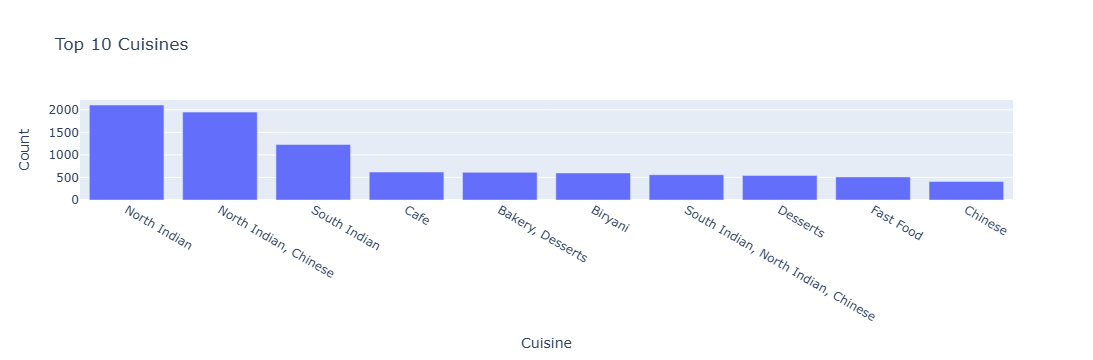

In [45]:
# Get the top 10 cuisines by count
top_cuisines = df.cuisines.value_counts().sort_values(ascending=False).head(10)

# Create a bar chart using Plotly Express
fig = px.bar(
    x=top_cuisines.index,  # Cuisine names
    y=top_cuisines.values,  # Count values
    labels={'x': 'Cuisine', 'y': 'Count'},
    title='Top 10 Cuisines'
)

fig.show()

 North Indian, Chinese & South Indian are some of the popular cuisines in Bangalore